In [46]:
''' required import '''

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import pytesseract

In [47]:
''' some useful function '''

def noiseReducer(img):
    img = np.array(img)
    img = cv2.GaussianBlur(img, (7, 7), 0)
    img = Image.fromarray(img, 'RGB')
    return img

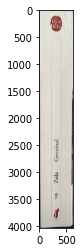

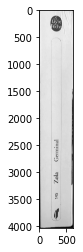

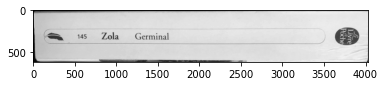

 
     
 

Zola

Germinal



In [48]:
''' book spine processing '''

# constraint : 
# 

# image load
img = Image.open('../image/bookSpine/3.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)


"""
img : image of a book spine
return : book's information
"""
def bookSpineProcessing(img):
    
    width, height = img.size
    
    # gray converter
    img = np.array(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # binarisation
    # binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    # noise reducer
    #img = cv2.GaussianBlur(gray, (7, 7), 0)
    img = Image.fromarray(gray)
    
    # rotation
    rotate = img.rotate(-90, expand = 1)
    plt.imshow(rotate, cmap='gray')
    plt.show()
    
    # OCR
    text = pytesseract.image_to_string(rotate)
    print(text)
    
    return None

# show result
bookSpineProcessing(img)

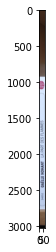

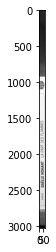

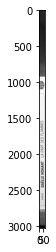

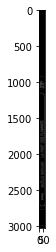

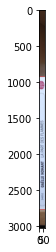

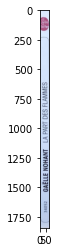

In [50]:
''' book spine extraction '''

# constraint :
# nothing for now

# image load
img = Image.open('../image/noisyBookSpine/3')
plt.imshow(img)
plt.show()


"""
img : image of a noisy book spine
return : list of book spine
"""
def bookSpineExtraction(img):
    
    width, height = img.size
    img = np.array(img)
    
    # gray converter
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # histogram equalizer
    #gray = cv2.equalizeHist(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 10, 100)
    plt.imshow(edges, cmap='gray')
    plt.show()  

    # hough transform
    threshold = width//2
    coordinate = []
    houghTransform = img.copy()
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    if lines is None:
        lines = [[]]
    coordinate.append((0,0))
    for line in lines:
        for rho,theta in line:
            if np.pi/2-0.01<theta and theta<np.pi/2+0.01:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + width*(-b))
                y1 = int(y0 + height*(a))
                x2 = int(x0 - width*(-b))
                y2 = int(y0 - height*(a))
                houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
                coordinate.append((y1,y2))
    coordinate.append((height,height))
    plt.imshow(houghTransform)
    plt.show()
    
    # segmentation
    croppedImg = []
    coordinate.sort()
    img = Image.fromarray(img, 'RGB')
    last = None
    threshold = height//10
    for y1,y2 in coordinate:
        if (last != None and last<min(y1,y2)-threshold):
            # crop
            im = img.crop((0, last, width, max(y1,y2)))
            w,h = im.size
            # add it
            croppedImg.append((h,im))
        last = min(y1,y2)
    croppedImg.sort(reverse=True, key = lambda x: x[0])
    i, img = croppedImg[0]
    return img

img = bookSpineExtraction(img)
plt.imshow(img)
plt.show()

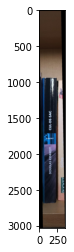

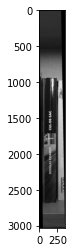

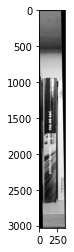

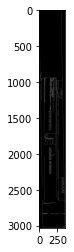

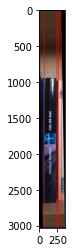

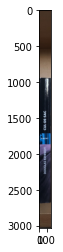

In [51]:
''' row segmentation lvl2 '''

# constraint :
# nothing for now

# image load
img = Image.open('../image/noisyBookSpine/9')
plt.imshow(img)
plt.show()


"""
img : image of a noisy book spine
return : list of book spine
"""
def rowSegmentation2(img):
    
    width, height = img.size
    img = np.array(img)
    
    # gray converter
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # histogram equalizer
    gray = cv2.equalizeHist(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.show()  

    # hough transform
    threshold = 300
    coordinate = []
    houghTransform = img.copy()
    lines = ( cv2.HoughLines(edges, 1, np.pi/180, threshold))
    if lines is None:
        lines = [[]]
    coordinate.append((0,0))
    for line in lines:
        for rho,theta in line:
            if theta<np.pi/2-0.3 or np.pi/2+0.3<theta:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + width*(-b))
                y1 = int(y0 + height*(a))
                x2 = int(x0 - width*(-b))
                y2 = int(y0 - height*(a))
                houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
                coordinate.append((x1,x2))
    coordinate.append((width,width))
    plt.imshow(houghTransform)
    plt.show()
    
    # segmentation
    croppedImg = []
    coordinate.sort()
    img = Image.fromarray(img, 'RGB')
    last = None
    threshold = width//5
    for x1,x2 in coordinate:
        if (last != None and last<min(x1,x2)-threshold):
            # crop
            im = img.crop((last, 0, max(x1,x2), height))
            # add it
            croppedImg.append(im)
        last = min(x1,x2)
        
    return croppedImg

images = rowSegmentation2(img)
for im in images:
    plt.imshow(im)
    plt.show()

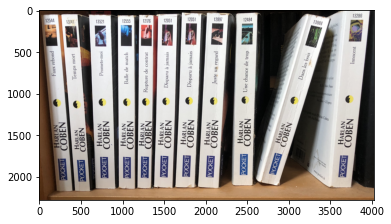

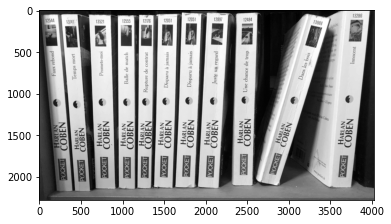

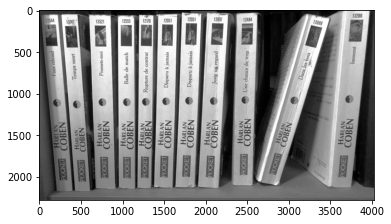

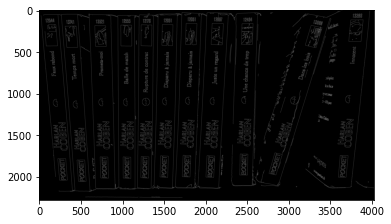

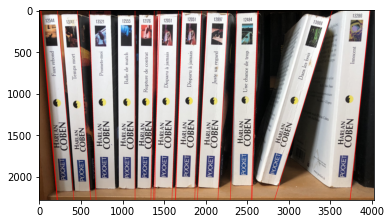

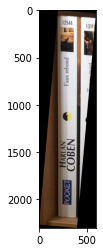

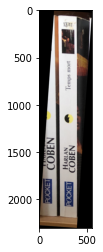

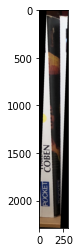

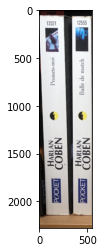

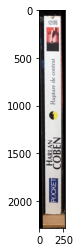

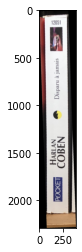

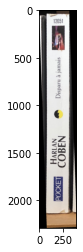

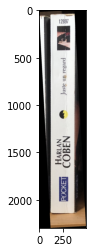

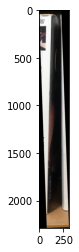

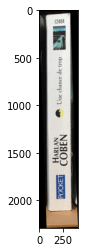

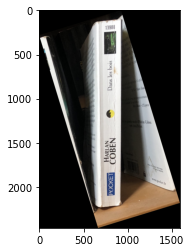

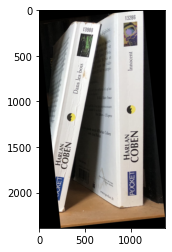

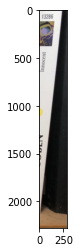

In [52]:
''' row segmentation lvl1 '''

# constraint : 
# doesn't work with thin book spines 
# it's much better with vertical books
# only book spines should apear

# image load
img = Image.open('../image/bookRow/7.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)

"""
img : image of a book row
return : list of noisy book spines
"""
def rowSegmentation1(img):
    
    width, height = img.size
    img = np.array(img)
    
    # gray converter
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # histogram equalizer
    gray = cv2.equalizeHist(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.show()  

    # hough transform
    threshold = 300
    coordinate = []
    houghTransform = img.copy()
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    if lines is None:
        lines = [[]]
    coordinate.append((0,0,0))
    for line in lines:
        for rho,theta in line:
            if theta<np.pi/2-0.3 or np.pi/2+0.3<theta:
                a0 = np.cos(theta)
                b0 = np.sin(theta)
                if a0 == 0: # y = rho
                    x1 = 0
                    y1 = rho
                    x2 = width
                    y2 = rho
                elif b0 == 0: # x = rho
                    x1 = rho
                    y1 = 0
                    x2 = rho
                    y2 = height
                else: # y = ax + b
                    Xa = a0*rho
                    Ya = b0*rho
                    Xb = Xa + b0
                    Yb = Ya - a0
                    a = -a0/b0
                    b = Ya - a*Xa
                    x1 = -b/a
                    y1 = 0
                    x2 = (height-b)/a
                    y2 = height
                x1 = int(x1)
                y1 = int(y1)
                x2 = int(x2)
                y2 = int(y2)
                houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
                coordinate.append((x1,x2,theta))
    coordinate.append((width,width,0))
    plt.imshow(houghTransform)
    plt.show()
    
    # segmentation
    croppedImg = []
    coordinate.sort()
    img = Image.fromarray(img, 'RGB')
    last = None
    threshold = width/50
    for x1,x2,theta in coordinate:
        if (last != None and last<min(x1,x2)-threshold):
            # crop
            im = img.crop((last, 0, max(x1,x2), height))
            # rotate
            theta = math.degrees(theta)
            if theta>90:
                theta = theta-180
            else:
                theta = theta
            im = im.rotate(theta, expand = 1)
            # add it
            croppedImg.append(im)
        last = min(x1,x2)
    
    return croppedImg

# show result
images = rowSegmentation1(img)
for im in images:
    plt.imshow(im)
    plt.show()

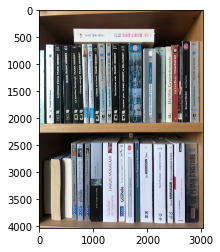

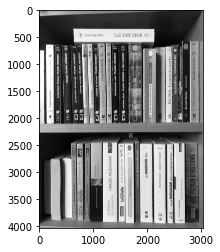

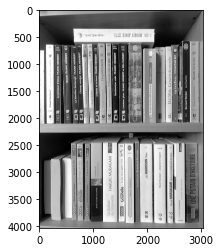

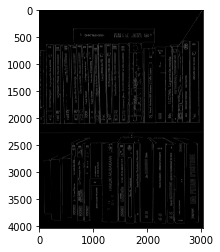

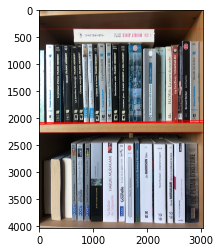

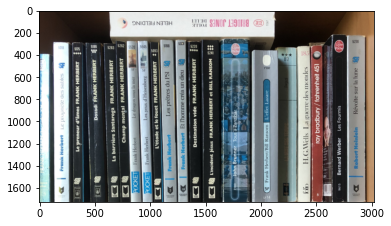

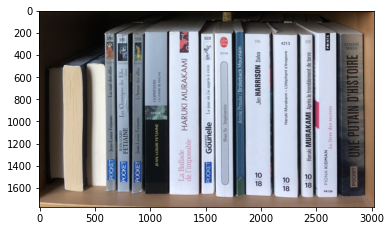

In [53]:
''' bookshelf segmentation '''

# constraint : 
# doesn't work with thin book spines 
# doesn't work with low definition image

# image load
img = Image.open('../image//bookshelf/3.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)


"""
img : image of a vertical bookshelf
return : list of book rows
"""
def bookshelfSegmentation(img):
    
    width, height = img.size
    img = np.array(img)
    
    # gray converter
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # histogram equalizer
    gray = cv2.equalizeHist(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # canny filter
    edges = cv2.Canny(gray, 50, 200)
    plt.imshow(edges, cmap='gray')
    plt.show()

    # hough transform
    threshold = 300
    coordinate = []
    houghTransform = img.copy()
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    if lines is None:
        lines = [[]]
    coordinate.append(0)
    for line in lines:
        for rho,theta in line:
            if np.pi/2-0.1<theta and theta<np.pi/2+0.1:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + width*(-b))
                y1 = int(y0 + height*(a))
                x2 = int(x0 - width*(-b))
                y2 = int(y0 - height*(a))
                houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
                coordinate.append((y1+y2)//2)
    coordinate.append(height)
    plt.imshow(houghTransform)
    plt.show()

    # crop image
    croppedImg = []
    coordinate.sort()
    img = Image.fromarray(img, 'RGB')
    last = None
    threshold = height/10
    for y in coordinate:
        if (last != None and last<y-threshold):
            croppedImg.append(img.crop((0, last, width, y)))
        last = y
    
    return croppedImg

# show result
images = bookshelfSegmentation(img)
for im in images:
    plt.imshow(im)
    plt.show()

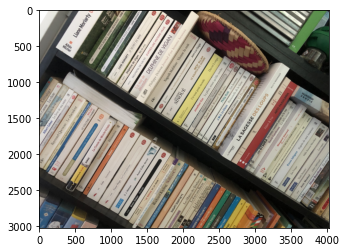

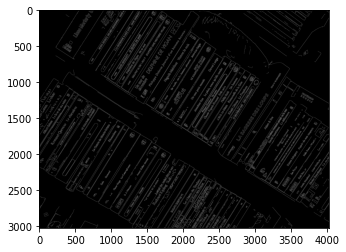

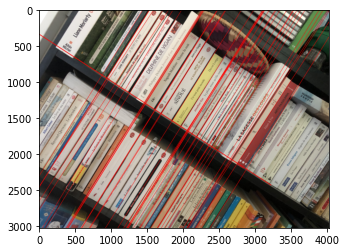

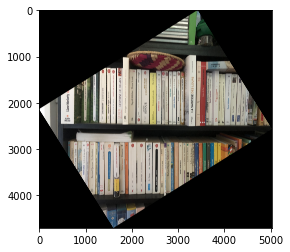

In [54]:
''' bookshelf orientation '''

# constraint : 
# the majority of the books must be well oriented
# the image should not be too askew

# image load
img = Image.open('../image/askewBookshelf/1.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)

"""
img : askew image of bookshelf
return : reoriented image
"""
def bookshelfOrientation(img):
    
    width, height = img.size
    img = np.array(img)
    
    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.show()  

    # hough transform
    treshold = 500
    lines = cv2.HoughLines(edges, 1, np.pi/180, treshold)
    length = max(width, height)
    angles = []
    houghTransform = img.copy()
    if lines is None:
        lines = [[]]
    for line in lines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + length*(-b))
            y1 = int(y0 + length*(a))
            x2 = int(x0 - length*(-b))
            y2 = int(y0 - length*(a))
        
            houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
            angles.append(theta)

    plt.imshow(houghTransform)
    plt.show()
    
    # orientation
    angles.sort()
    theta = angles[len(angles)//2]
    theta = math.degrees(theta)
    if theta>90:
        theta = theta - 180
    img = Image.fromarray(img, 'RGB')
    img = img.rotate(theta, expand = 1)
    
    return img

# show result
img = bookshelfOrientation(img)
plt.imshow(img)
plt.show()

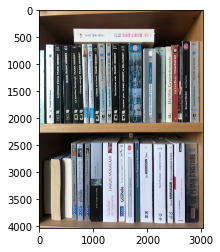

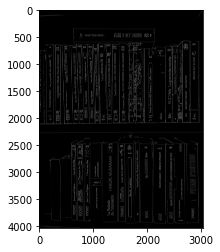

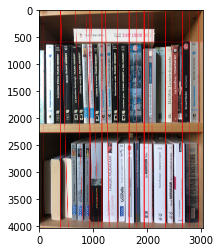

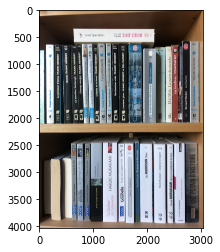

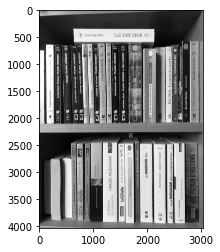

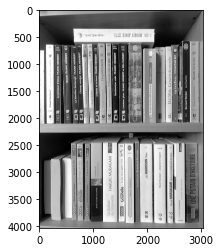

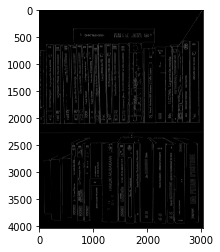

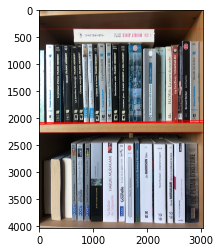

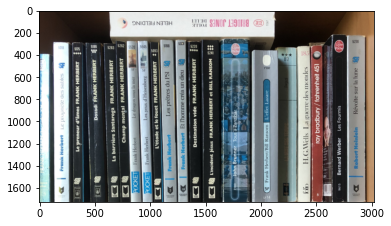

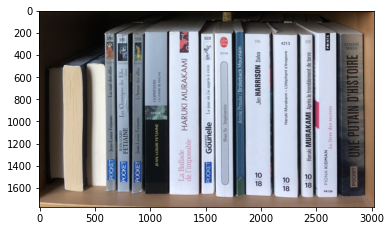

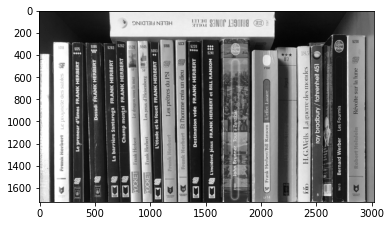

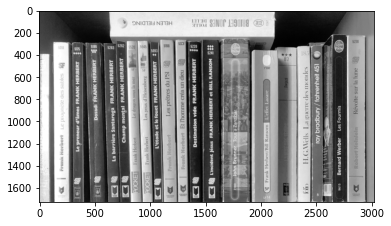

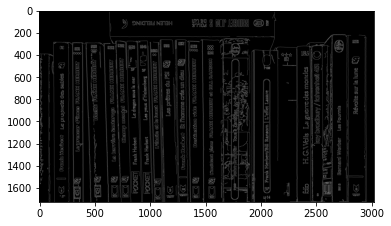

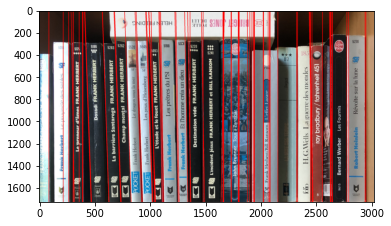

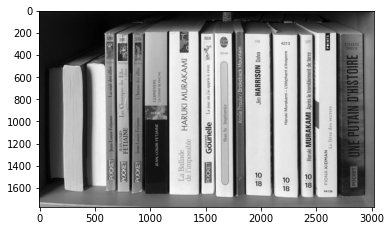

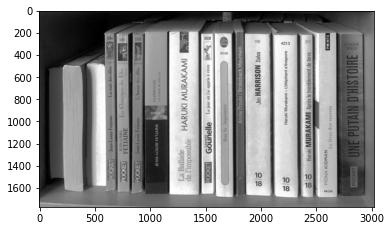

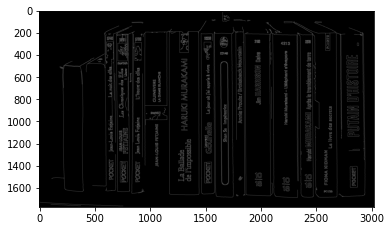

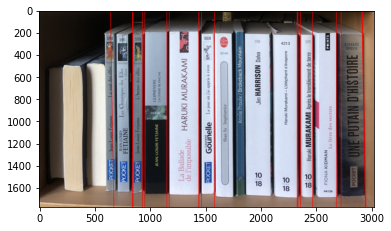

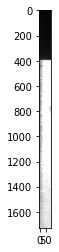

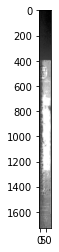

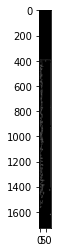

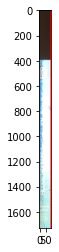

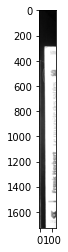

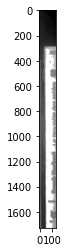

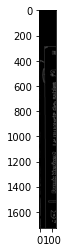

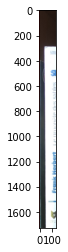

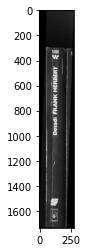

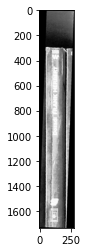

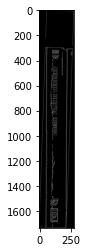

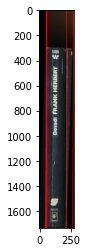

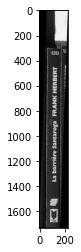

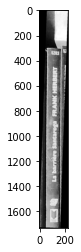

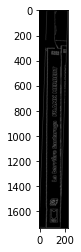

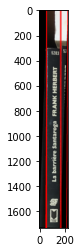

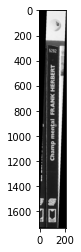

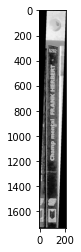

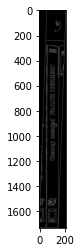

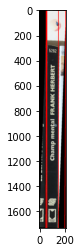

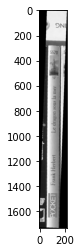

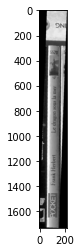

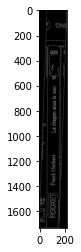

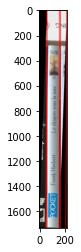

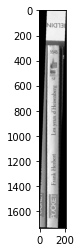

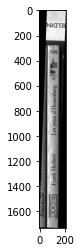

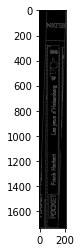

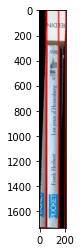

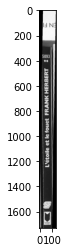

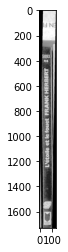

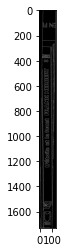

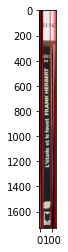

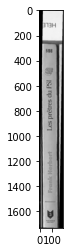

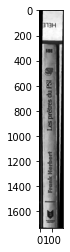

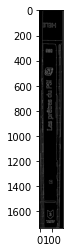

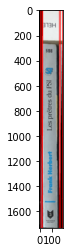

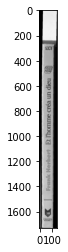

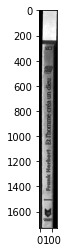

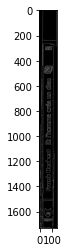

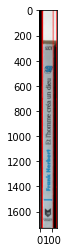

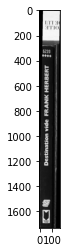

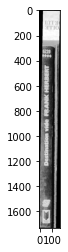

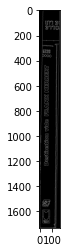

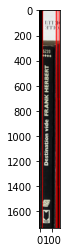

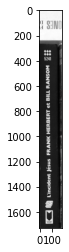

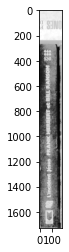

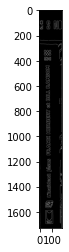

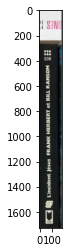

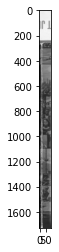

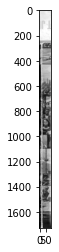

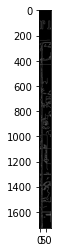

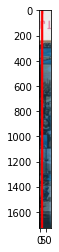

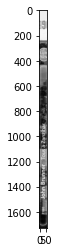

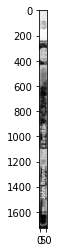

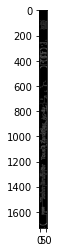

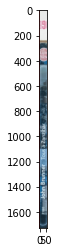

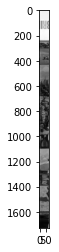

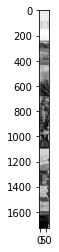

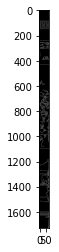

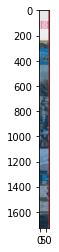

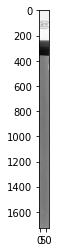

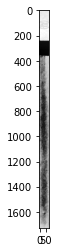

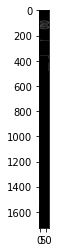

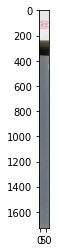

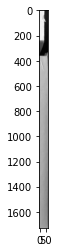

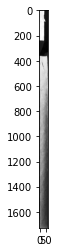

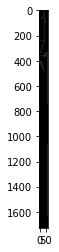

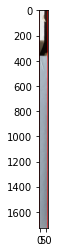

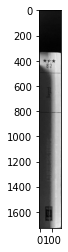

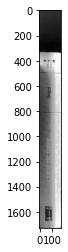

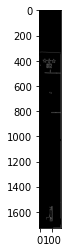

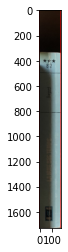

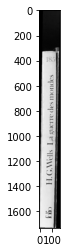

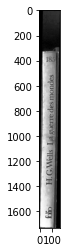

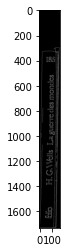

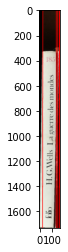

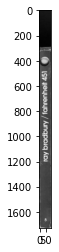

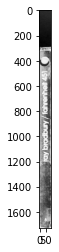

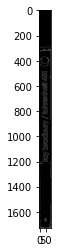

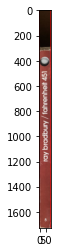

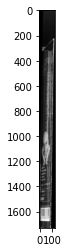

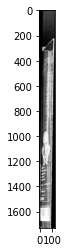

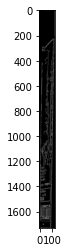

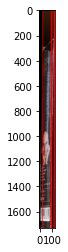

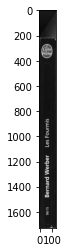

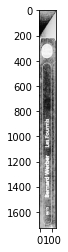

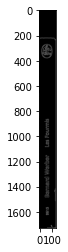

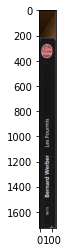

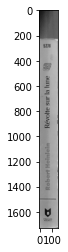

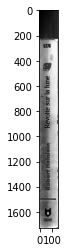

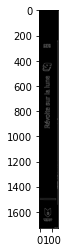

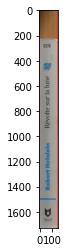

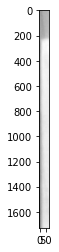

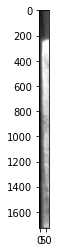

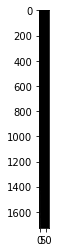

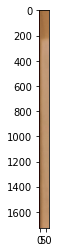

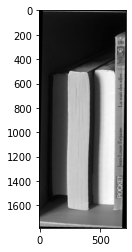

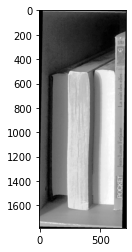

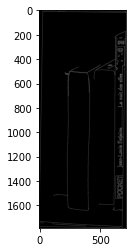

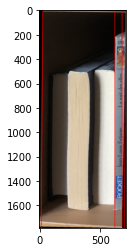

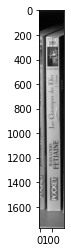

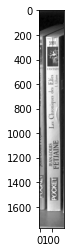

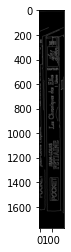

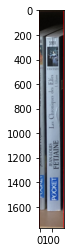

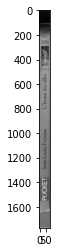

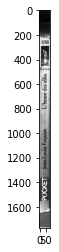

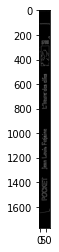

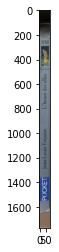

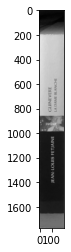

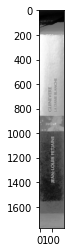

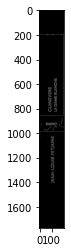

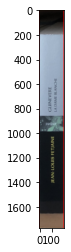

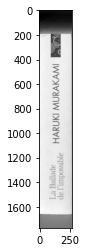

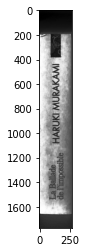

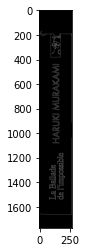

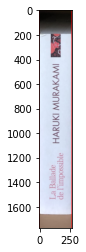

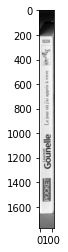

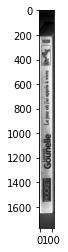

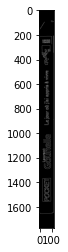

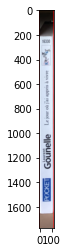

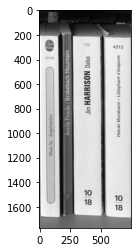

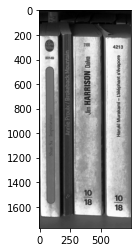

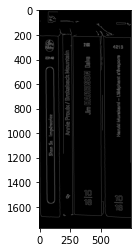

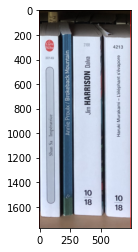

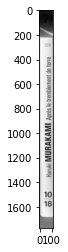

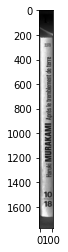

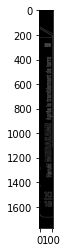

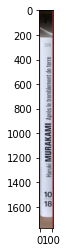

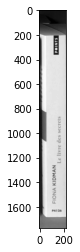

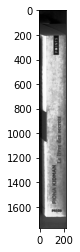

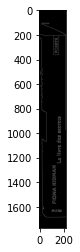

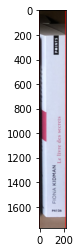

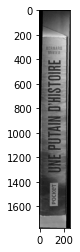

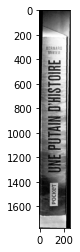

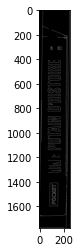

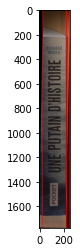

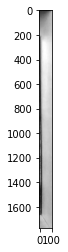

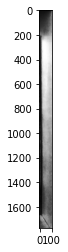

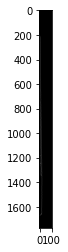

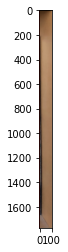

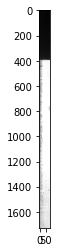

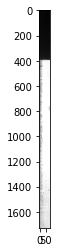

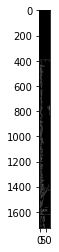

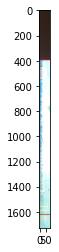

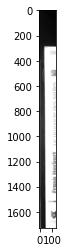

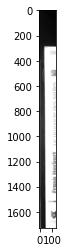

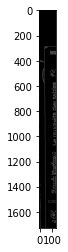

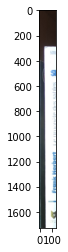

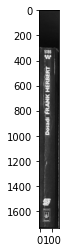

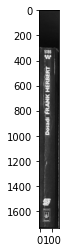

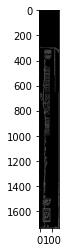

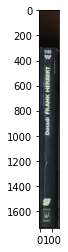

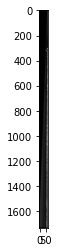

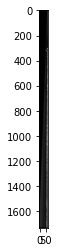

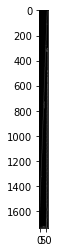

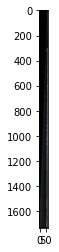

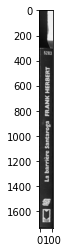

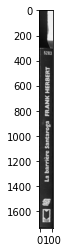

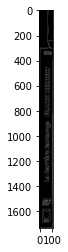

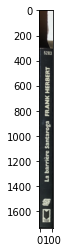

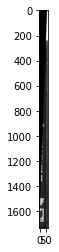

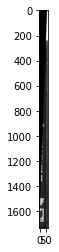

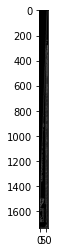

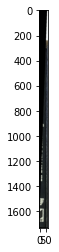

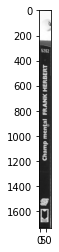

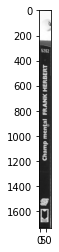

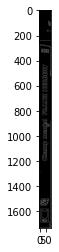

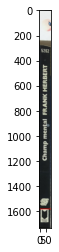

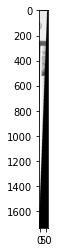

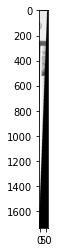

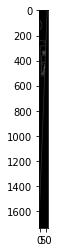

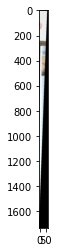

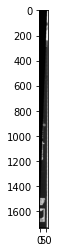

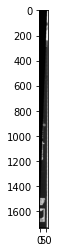

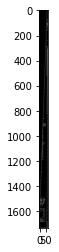

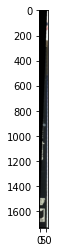

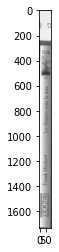

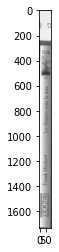

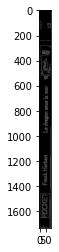

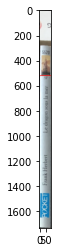

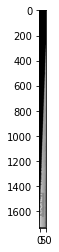

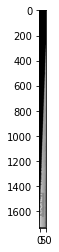

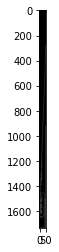

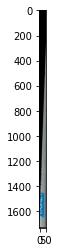

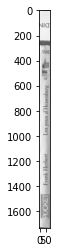

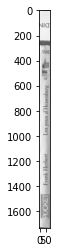

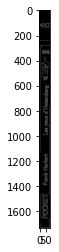

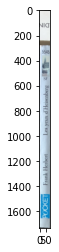

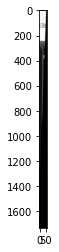

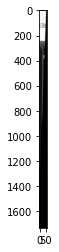

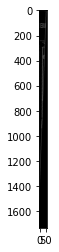

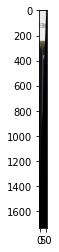

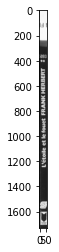

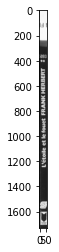

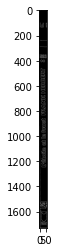

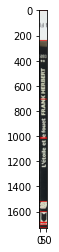

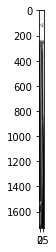

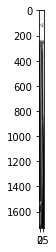

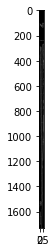

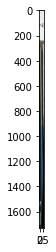

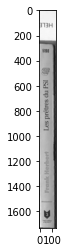

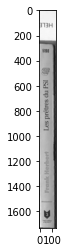

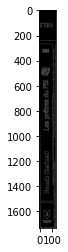

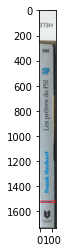

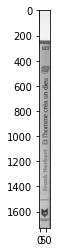

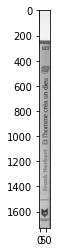

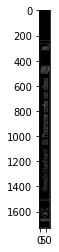

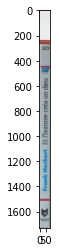

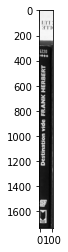

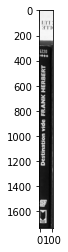

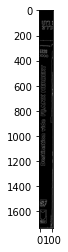

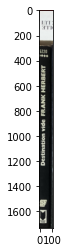

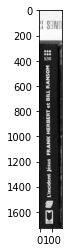

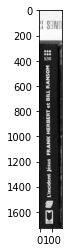

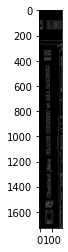

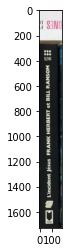

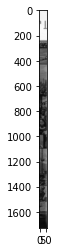

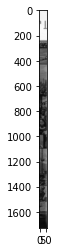

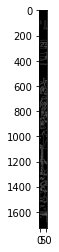

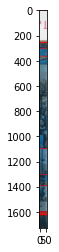

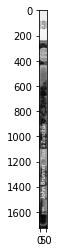

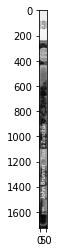

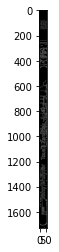

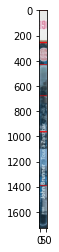

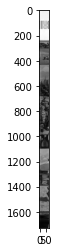

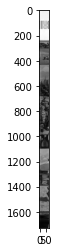

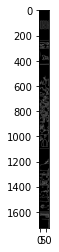

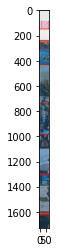

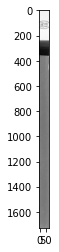

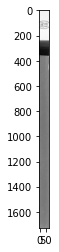

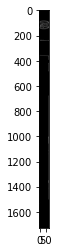

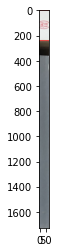

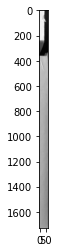

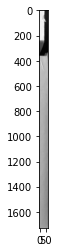

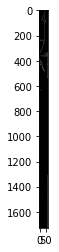

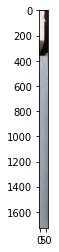

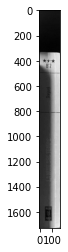

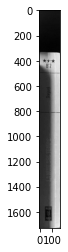

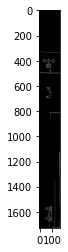

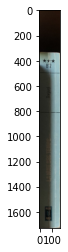

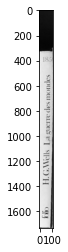

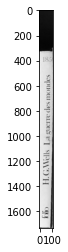

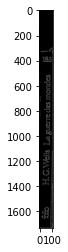

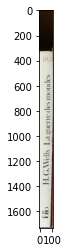

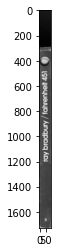

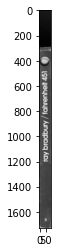

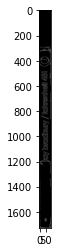

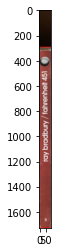

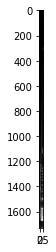

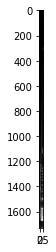

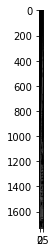

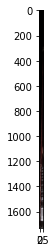

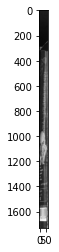

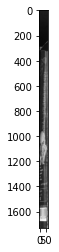

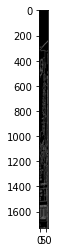

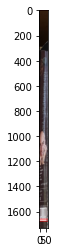

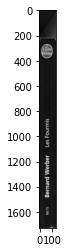

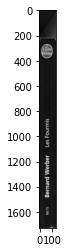

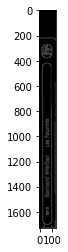

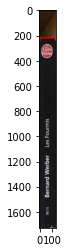

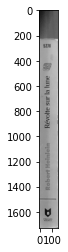

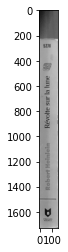

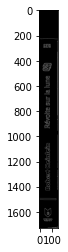

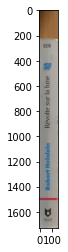

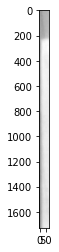

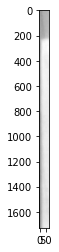

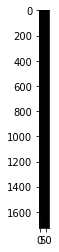

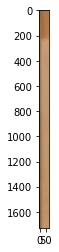

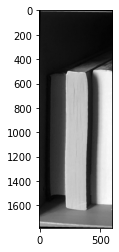

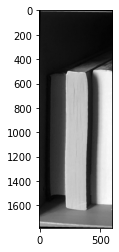

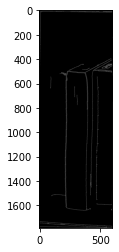

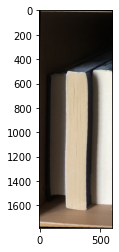

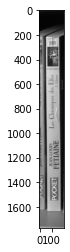

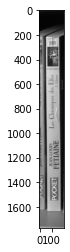

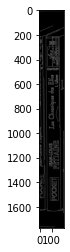

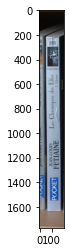

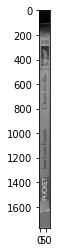

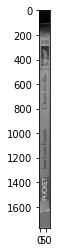

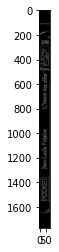

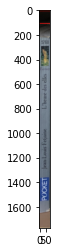

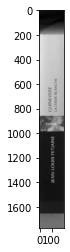

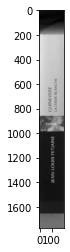

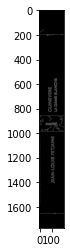

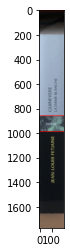

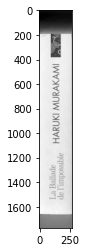

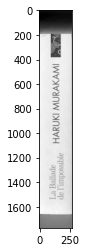

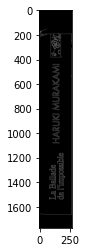

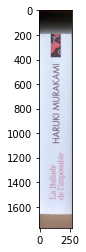

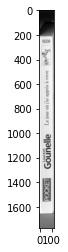

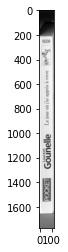

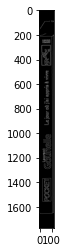

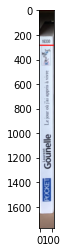

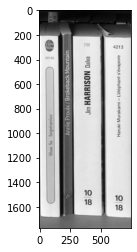

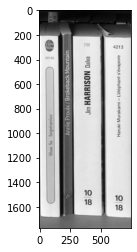

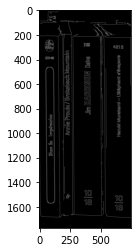

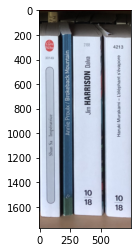

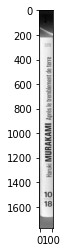

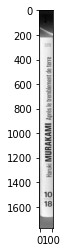

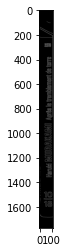

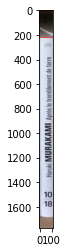

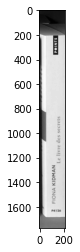

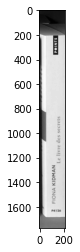

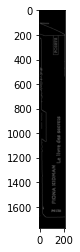

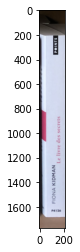

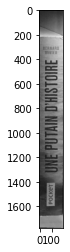

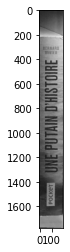

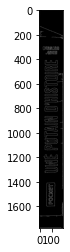

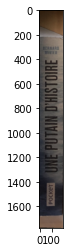

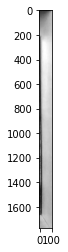

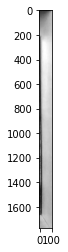

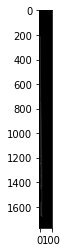

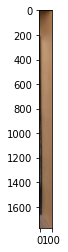

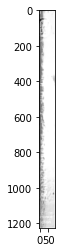

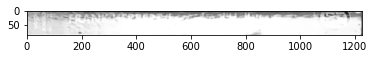

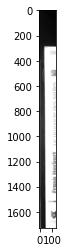

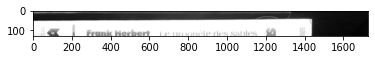

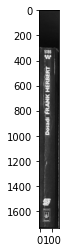

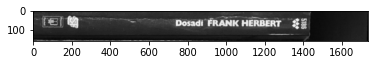

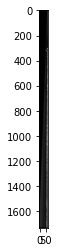

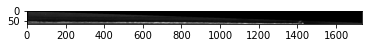

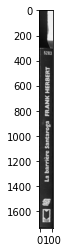

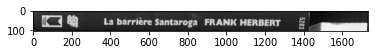

r 4% Pe a



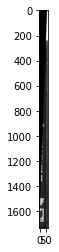

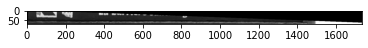

a eee ee em



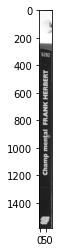

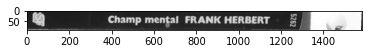

Q ee me a: Ne



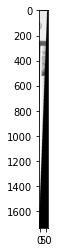

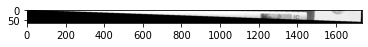

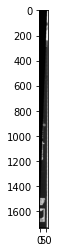

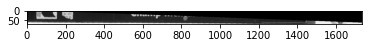

hehe sf

a o--



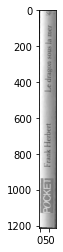

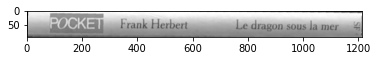

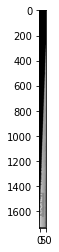

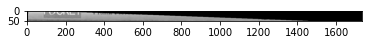

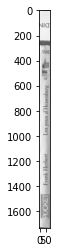

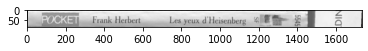

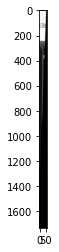

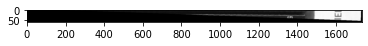

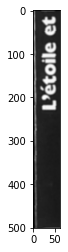

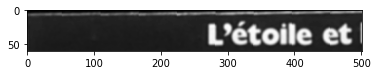

Vétoile et



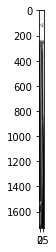

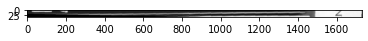

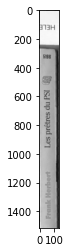

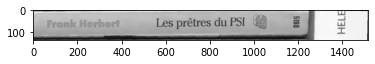

Les prétres du PSI &

HELE



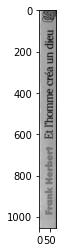

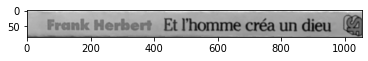

Frank Herbert Et !homme créa un dieu @

 



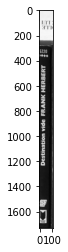

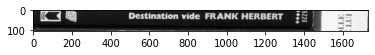

Destination vide FRANK HERBERT



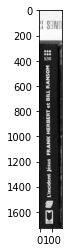

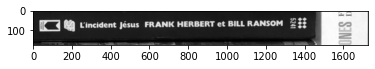

4 &@ Lincident Jésus FRANK HERBERT et BILL RANSOM

Th)

Saad



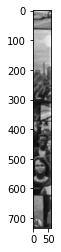

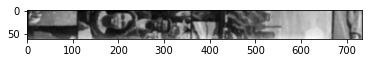

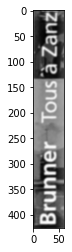

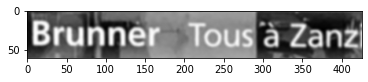

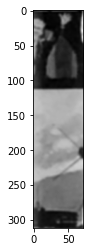

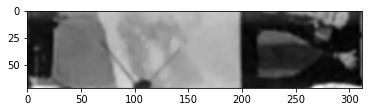

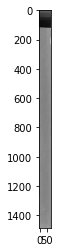

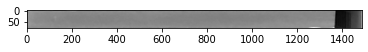

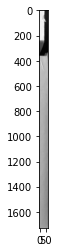

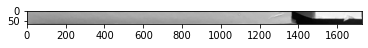

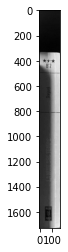

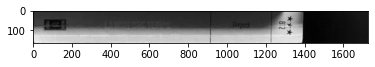

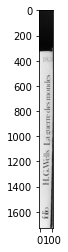

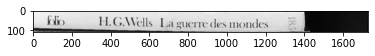

bolio H.G.Wells La guerre des mondes eS
rr ——“(‘“‘<i i ae



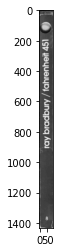

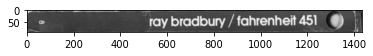

—-

ray bradbury / fahrenheit 451 @ |



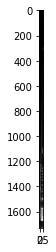

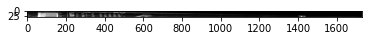

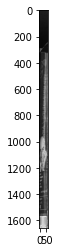

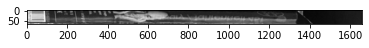

—_ ~ i
~ wad Sale
\ [ae 4
A Se
tA \ ae
Blame ————



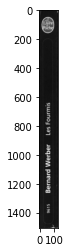

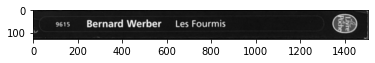

9615 Bernard Werber Les Fourmis



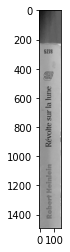

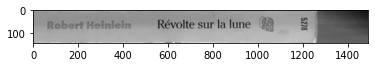

Robert Heinlein Révolte sur la lune @ 8 ——_



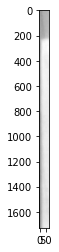

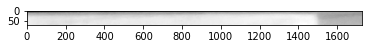

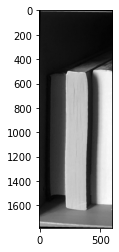

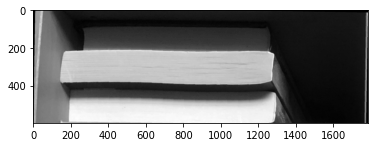

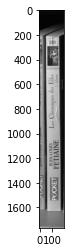

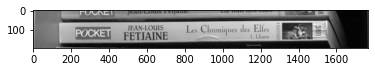

JEAN-LOUIS PF CUualhe bsG FEMME LED O VEEL {tld co

re JEAN LOUIS . | aaa Col 5 | 2
ON SE EE

  
 
    
 

 



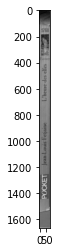

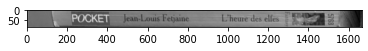

\

POCK|

Jean-Louis Feyaine

Vheure des elfes " 2g = a



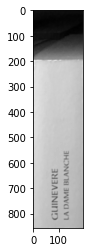

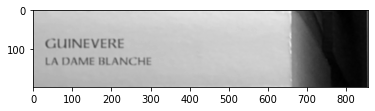

GUINEVERE

LA DAME BLANCHI



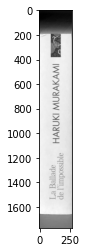

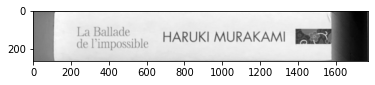

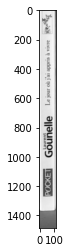

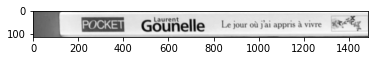

 

| POCKE Gounelle Le jour oi j'ai appris a vivre akg



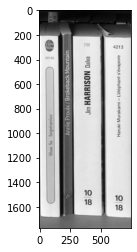

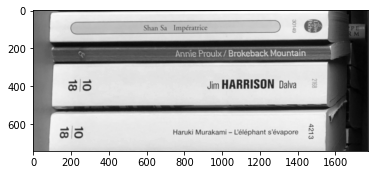

Jim HARRISON Dalva

Haruki Murakami - L’éléphant s’évapore

 



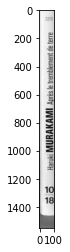

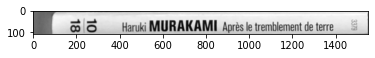

 

. © Oo Haruki MURAKAMI Aprés |e tremblement de terre =



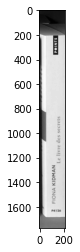

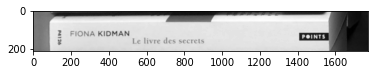

y
ot
yD
>

FIONA KIDMAN

Le livre des secrets

 



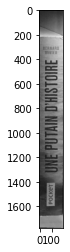

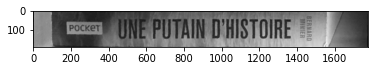

 

ooh UNE PUTAIN D'HISTOIRE =



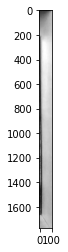

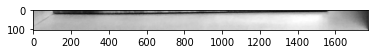

In [55]:
''' all process '''

# image load
img = Image.open('../image/bookshelf/3.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)

# orientation
reoriented = bookshelfOrientation(img)
plt.imshow(reoriented)
plt.show()

# bookshelf segmentation
rows = bookshelfSegmentation(reoriented)
for im in rows:
    plt.imshow(im)
    plt.show()

# row segmentation 1
row1 = []
for im in rows:
    spines = rowSegmentation1(im)
    row1 = row1 + spines
    
# row segmentation 2
row2 = []
for im in row1:
    spines = rowSegmentation2(im)
    row2 = row2 + spines

# spine extraction
bookSpine = []
for im in row2:
    bookSpine.append(bookSpineExtraction(im))

# book spine processing
for book in bookSpine:
    bookSpineProcessing(book)